In [1]:
import pandas
import datetime
import numpy
import scipy.optimize
import seaborn as sns
import matplotlib.pyplot as plt
import os
import time
import bs4
import urllib
from matplotlib.colors import ListedColormap
from matplotlib.colors import Normalize
from matplotlib import ticker
%matplotlib inline
from matplotlib import rcParams

In [2]:
# setup some cutoff values we'll use in the analysis
velCutoffUpper = 2000.
velCutoffLower = 0.
numPointsCutoffMLTMLAT = 250
mlatCutOffUpper = 70.

In [3]:
velGmagDF = pandas.read_csv("../data/processed-vels-geomag.txt", sep=' ')
velGmagDF = velGmagDF.drop('Unnamed: 0', axis=1)
# Filter out some values where number of datapoints are pretty low.
countDF = velGmagDF.groupby([ "normMLT", "MLAT" ]).size().reset_index()
countDF.columns = [ "normMLT", "MLAT", "count" ]
# Choose only columns which have atleast some points
countDF = countDF[ countDF["count"] >= numPointsCutoffMLTMLAT ].reset_index(drop=True)
# Merge with velsDataDF to filter out unwanted values
velGmagDF = pandas.merge( velGmagDF, countDF,\
                          on=["normMLT", "MLAT"], how='inner' )
# Discard unwanted values
# We'll only consider those velocities 
# which lie between 0 and 2500 m/s
# and located below 70 MLAT
velGmagDF = velGmagDF[ (velGmagDF["vSaps"] > velCutoffLower) \
                        & (velGmagDF["vSaps"] < velCutoffUpper)\
                       ].reset_index(drop=True)
velGmagDF = velGmagDF[ velGmagDF["MLAT"] < mlatCutOffUpper ].reset_index(drop=True)
# Groupby Dst bin
dstLocDF = velGmagDF.groupby( [ "dst_bin", "normMLT", "MLAT" ] ).mean().reset_index()
dstLocDF["dst_bin"].unique()

array(['(-10, 10]', '(-150, -75]', '(-25, -10]', '(-50, -25]', '(-75, -50]'], dtype=object)

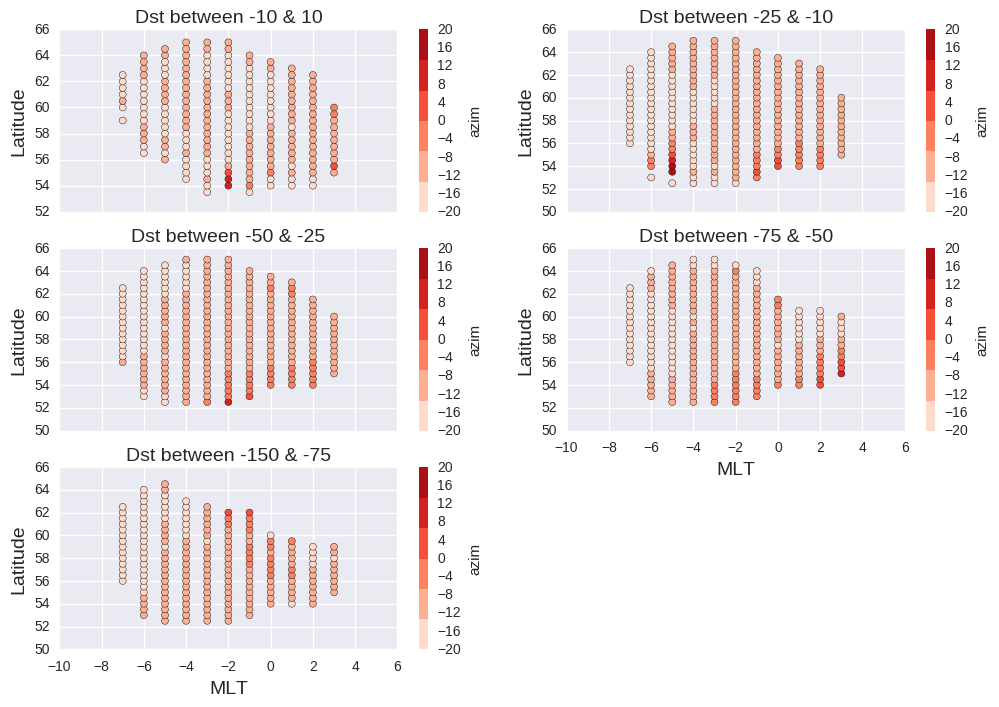

In [4]:
# Make a comparison plot of the data
# for prob of occ at diff locs
# Set up the matplotlib figure
f = plt.figure(figsize=(12, 8))
ax1 = f.add_subplot(3,2,1)
ax2 = f.add_subplot(3,2,2)
ax3 = f.add_subplot(3,2,3)
ax4 = f.add_subplot(3,2,4)
ax5 = f.add_subplot(3,2,5)

seaMap = ListedColormap(sns.color_palette("Reds"))
# (-10,10]
dstSapsMLTLat1010 = dstLocDF[ dstLocDF["dst_bin"] == "(-10, 10]" ]
dstSapsMLTLat1010.plot( kind='scatter',
              x='normMLT',
              y='MLAT',
              c='azim',
              s=25, cmap=seaMap, vmin=-20, vmax=20, ax=ax1, sharex=True)
ax1.set_xlabel("MLT", fontsize=14)
ax1.set_ylabel("Latitude", fontsize=14)
ax1.set_title( "Dst between -10 & 10", fontsize=14 )
ax1.set_xlim([-10., 6.])
# (-25, -10]
dstSapsMLTLat2510 = dstLocDF[ dstLocDF["dst_bin"] == "(-25, -10]" ]
dstSapsMLTLat2510.plot( kind='scatter',
              x='normMLT',
              y='MLAT',
              c='azim',
              s=25, cmap=seaMap, vmin=-20, vmax=20, ax=ax2)
ax2.set_xlabel("MLT", fontsize=14)
ax2.set_ylabel("Latitude", fontsize=14)
ax2.set_title( "Dst between -25 & -10", fontsize=14 )
ax2.set_xlim([-10., 6.])
# (-50, -25]
dstSapsMLTLat5025 = dstLocDF[ dstLocDF["dst_bin"] == "(-50, -25]" ]
dstSapsMLTLat5025.plot( kind='scatter',
              x='normMLT',
              y='MLAT',
              c='azim',
              s=25, cmap=seaMap, vmin=-20, vmax=20, ax=ax3)
ax3.set_xlabel("MLT", fontsize=14)
ax3.set_ylabel("Latitude", fontsize=14)
ax3.set_title( "Dst between -50 & -25", fontsize=14 )
ax3.set_xlim([-10., 6.])
# (-75, -50]
dstSapsMLTLat7550 = dstLocDF[ dstLocDF["dst_bin"] == "(-75, -50]" ]
dstSapsMLTLat7550.plot( kind='scatter',
              x='normMLT',
              y='MLAT',
              c='azim',
              s=25, cmap=seaMap, vmin=-20, vmax=20, ax=ax4)
ax4.set_xlabel("MLT", fontsize=14)
ax4.set_ylabel("Latitude", fontsize=14)
ax4.set_title( "Dst between -75 & -50", fontsize=14 )
ax4.set_xlim([-10., 6.])
# (-150, -75]
dstSapsMLTLat15075 = dstLocDF[ dstLocDF["dst_bin"] == "(-150, -75]" ]
dstSapsMLTLat15075.plot( kind='scatter',
              x='normMLT',
              y='MLAT',
              c='azim',
              s=25, cmap=seaMap, vmin=-20, vmax=20, ax=ax5)
ax5.set_xlabel("MLT", fontsize=14)
ax5.set_ylabel("Latitude", fontsize=14)
ax5.set_title( "Dst between -150 & -75", fontsize=14 )
ax5.set_xlim([-10., 6.])

plt.savefig("../figs/allDstBinsAzims.pdf",bbox_inches='tight')

In [5]:
azimMeanDF = velGmagDF.groupby( ["normMLT", "dst_bin"] ).mean()["azim"].reset_index()
azimMeanDF.columns = [ "normMLT", "dst_bin", "azimMean" ]
azimStdDF = velGmagDF.groupby( ["normMLT", "dst_bin"] ).std()["azim"].reset_index()
azimStdDF.columns = [ "normMLT", "dst_bin", "azimStd" ]
azimMltDstDF = pandas.merge( azimMeanDF, azimStdDF, on=[ "normMLT", "dst_bin" ] )
azimMltDstDF.head()
# velGmagDF.columns

,normMLT,dst_bin,azimMean,azimStd
0,-7.0,"(-10, 10]",-14.736500,6.710663
1,-7.0,"(-150, -75]",-15.140415,5.092552
2,-7.0,"(-25, -10]",-15.635564,3.309642
3,-7.0,"(-50, -25]",-14.848537,3.189884
4,-7.0,"(-75, -50]",-15.250106,4.232791


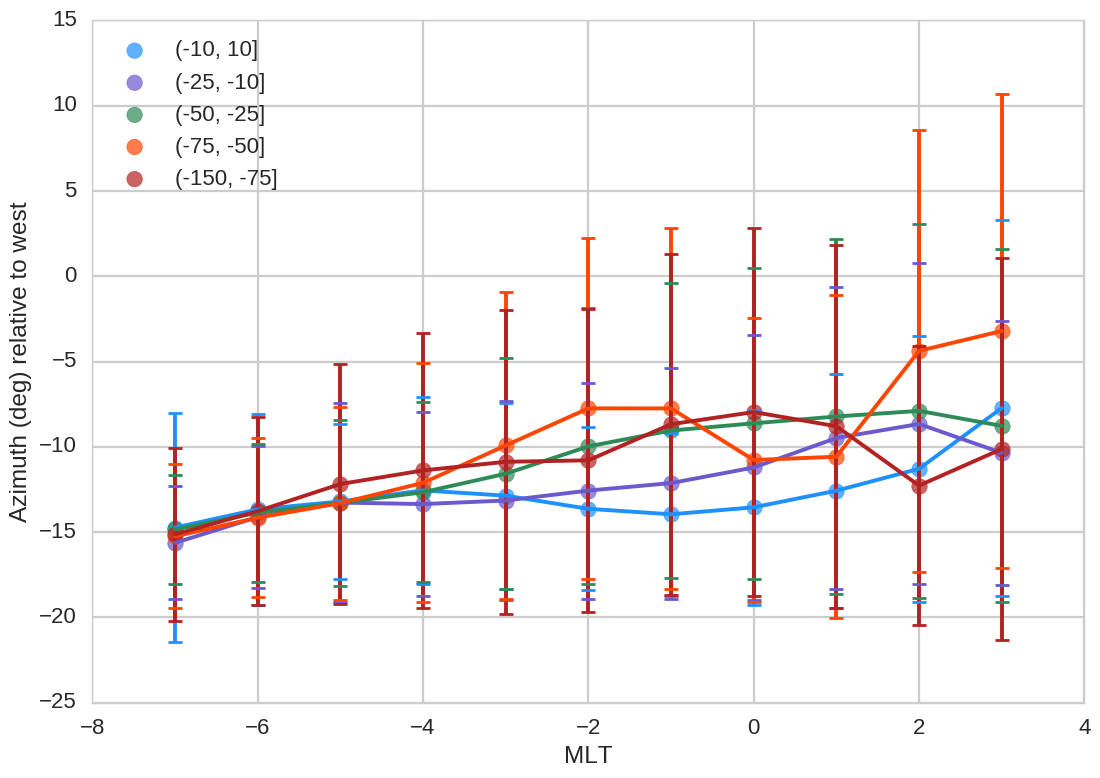

In [6]:
-

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f67d44e60d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f67d2836c10>]], dtype=object)

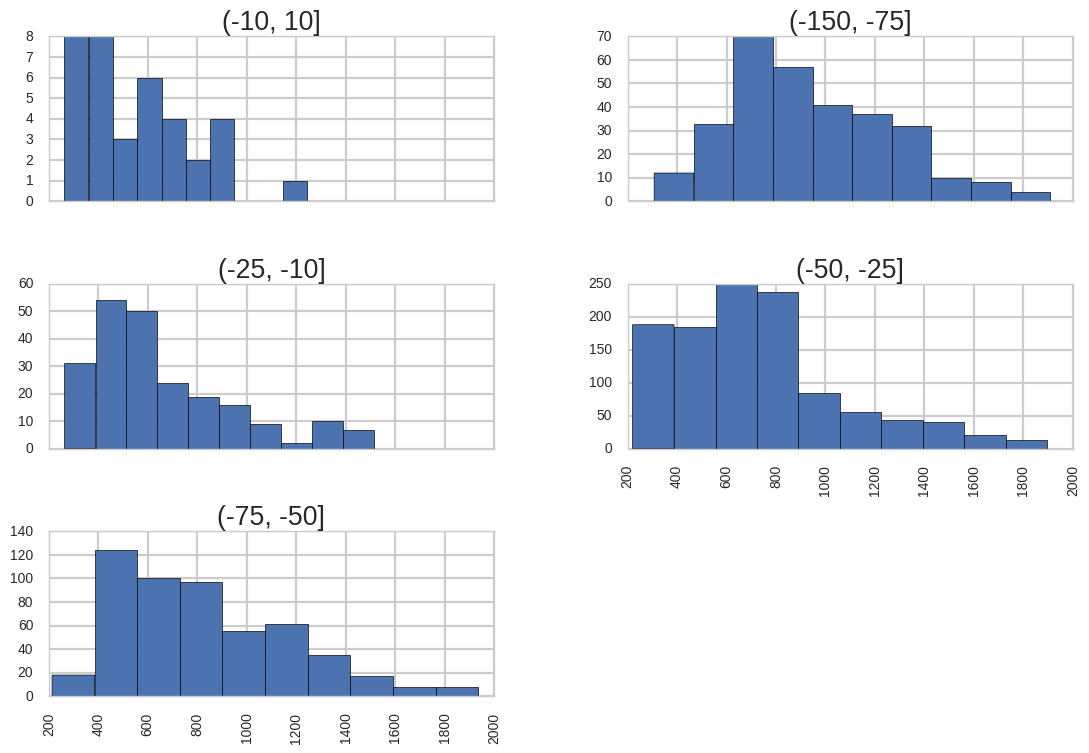

In [7]:
f = plt.figure(figsize=(12, 8))
ax = f.add_subplot()
testDF = velGmagDF[ (velGmagDF["MLAT"] == 59.) &\
                   (velGmagDF["normMLT"] == -5) ][ ["vSaps", "dst_bin"]\
                    ].reset_index(drop=True)
# x = testDF.hist()
testDF["vSaps"].hist(by=testDF["dst_bin"], xlabelsize=10., ylabelsize=10., sharex=True)
# ax.set_xlim( [0., 2000.] )

In [20]:
mlatMLTDstDF = velGmagDF.groupby( ["MLAT", "normMLT", "dst_bin"] )["vSaps"].count().reset_index()
mlatMLTDstDF.columns = [ "MLAT", "normMLT", "dst_bin", "count" ]
dstMaxCntDF = mlatMLTDstDF.groupby( ["dst_bin"] )["count"].max().reset_index()
dstMaxCntDF.columns = [ "dst_bin", "maxCntDst" ]
mlatMLTDstDF = pandas.merge( mlatMLTDstDF, dstMaxCntDF, on=[ "dst_bin" ] )
mlatMLTDstDF["probOcc"] = mlatMLTDstDF["count"]/mlatMLTDstDF["maxCntDst"]
mlatMLTDstDF[ mlatMLTDstDF["probOcc"] > 0.2 ].head()
newVelsDF = pandas.merge( mlatMLTDstDF, dstLocDF, on=["dst_bin", "MLAT", "normMLT"] )
newVelsDF.head()

,MLAT,normMLT,dst_bin,count_x,maxCntDst,probOcc,vSaps,azim,vMagnErr,azimErr,dtStr,tmStr,hour,dst_index,AE,AL,AO,AU,minute,count_y
0,52.5,-5.0,"(-150, -75]",150,617,0.243112,568.440467,-7.804467,3.485067,22.071400,2.012116e+07,289.493333,2.666667,-98.240000,829.693333,-579.446667,-164.806667,250.246667,22.826667,259.0
1,52.5,-4.0,"(-150, -75]",239,617,0.387358,508.360335,-8.459498,3.794519,24.599623,2.012037e+07,349.782427,3.213389,-98.246862,827.887029,-580.104603,-166.372385,247.782427,28.443515,365.0
2,52.5,-3.0,"(-150, -75]",228,617,0.369530,508.974605,-9.976228,3.541272,23.995746,2.012054e+07,374.333333,3.442982,-100.324561,791.197368,-537.820175,-142.421053,253.377193,30.035088,388.0
3,52.5,-2.0,"(-150, -75]",144,617,0.233387,495.990208,-7.549375,3.344167,23.213819,2.012393e+07,425.777778,3.979167,-98.354167,836.631944,-574.951389,-156.868056,261.680556,27.861111,307.0
4,53.0,-6.0,"(-150, -75]",163,617,0.264182,420.774110,-10.741902,3.212086,17.683067,2.012156e+07,199.914110,1.730061,-96.042945,868.226994,-593.098160,-159.220859,275.128834,26.907975,295.0


(-10.0, 6.0)

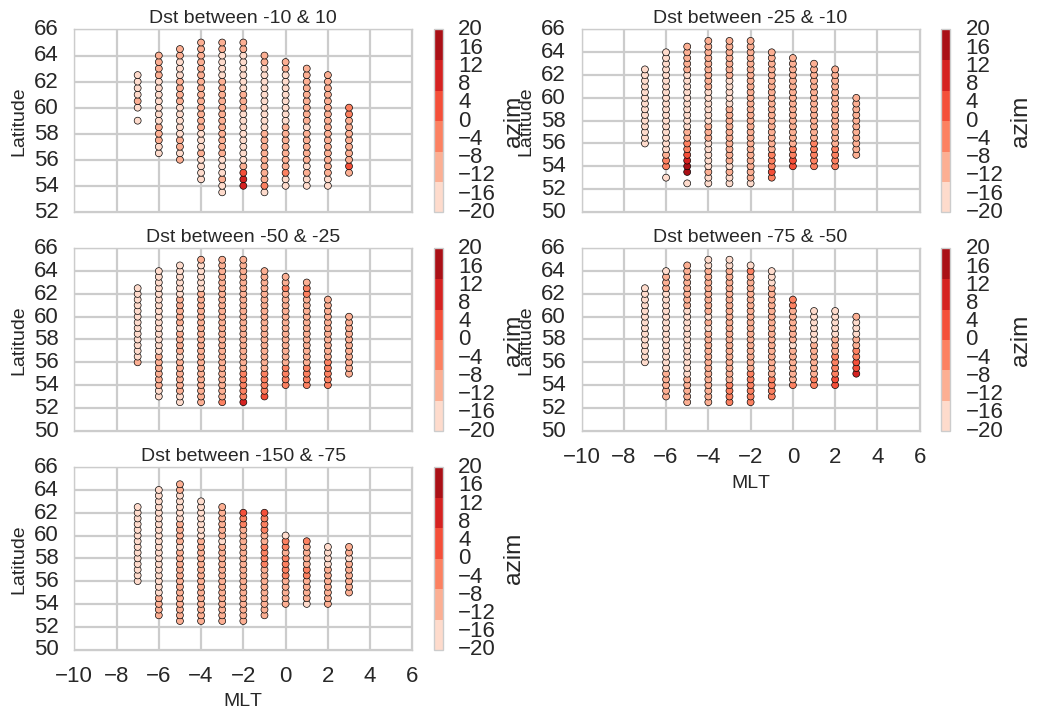

In [21]:
# Make a comparison plot of the data
# for prob of occ at diff locs
# Set up the matplotlib figure
f = plt.figure(figsize=(12, 8))
ax1 = f.add_subplot(3,2,1)
ax2 = f.add_subplot(3,2,2)
ax3 = f.add_subplot(3,2,3)
ax4 = f.add_subplot(3,2,4)
ax5 = f.add_subplot(3,2,5)

seaMap = ListedColormap(sns.color_palette("Reds"))
# (-10,10]
dstSapsMLTLat1010 = newVelsDF[ newVelsDF["dst_bin"] == "(-10, 10]" ]
dstSapsMLTLat1010.plot( kind='scatter',
              x='normMLT',
              y='MLAT',
              c='azim',
              s=25, cmap=seaMap, vmin=-20, vmax=20, ax=ax1, sharex=True)
ax1.set_xlabel("MLT", fontsize=14)
ax1.set_ylabel("Latitude", fontsize=14)
ax1.set_title( "Dst between -10 & 10", fontsize=14 )
ax1.set_xlim([-10., 6.])
# (-25, -10]
dstSapsMLTLat2510 = newVelsDF[ newVelsDF["dst_bin"] == "(-25, -10]" ]
dstSapsMLTLat2510.plot( kind='scatter',
              x='normMLT',
              y='MLAT',
              c='azim',
              s=25, cmap=seaMap, vmin=-20, vmax=20, ax=ax2)
ax2.set_xlabel("MLT", fontsize=14)
ax2.set_ylabel("Latitude", fontsize=14)
ax2.set_title( "Dst between -25 & -10", fontsize=14 )
ax2.set_xlim([-10., 6.])
# (-50, -25]
dstSapsMLTLat5025 = newVelsDF[ newVelsDF["dst_bin"] == "(-50, -25]" ]
dstSapsMLTLat5025.plot( kind='scatter',
              x='normMLT',
              y='MLAT',
              c='azim',
              s=25, cmap=seaMap, vmin=-20, vmax=20, ax=ax3)
ax3.set_xlabel("MLT", fontsize=14)
ax3.set_ylabel("Latitude", fontsize=14)
ax3.set_title( "Dst between -50 & -25", fontsize=14 )
ax3.set_xlim([-10., 6.])
# (-75, -50]
dstSapsMLTLat7550 = newVelsDF[ newVelsDF["dst_bin"] == "(-75, -50]" ]
dstSapsMLTLat7550.plot( kind='scatter',
              x='normMLT',
              y='MLAT',
              c='azim',
              s=25, cmap=seaMap, vmin=-20, vmax=20, ax=ax4)
ax4.set_xlabel("MLT", fontsize=14)
ax4.set_ylabel("Latitude", fontsize=14)
ax4.set_title( "Dst between -75 & -50", fontsize=14 )
ax4.set_xlim([-10., 6.])
# (-150, -75]
dstSapsMLTLat15075 = newVelsDF[ newVelsDF["dst_bin"] == "(-150, -75]" ]
dstSapsMLTLat15075.plot( kind='scatter',
              x='normMLT',
              y='MLAT',
              c='azim',
              s=25, cmap=seaMap, vmin=-20, vmax=20, ax=ax5)
ax5.set_xlabel("MLT", fontsize=14)
ax5.set_ylabel("Latitude", fontsize=14)
ax5.set_title( "Dst between -150 & -75", fontsize=14 )
ax5.set_xlim([-10., 6.])